# Table of contents

[Supervised - basic models](./supervised_basic.ipynb)

[Supervised - RNN models](./supervised_rnn.ipynb)

[Unsupervised - Word2Vec](./unsupervised_w2v.ipynb)

[Unsupervised - Dimensionality Reduction](./unsupervised_dim.ipynb)

[Unsupervised - LDA](./unsupervised_LDA.ipynb)

[Performance Evaluation](./evaluation.ipynb)

In [78]:
import numpy as np
import pandas as pd

import re
import random

from collections import Counter, defaultdict

from sklearn.dummy import DummyClassifier
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC

from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import plot_roc_curve

# from tqdm import tqdm
import pickle

import time


from sklearn.pipeline import Pipeline


from nltk.corpus import stopwords

# Suppress all warnings
import warnings
warnings.filterwarnings('ignore')

from preprocess_helper import preprocess_helper
from evaluation_helper import evaluation_helper

In [49]:
RANDOM_SEED=42

In [80]:
# preprocessor = preprocess_helper('data/WikiLarge_Train.csv')
# # X, y = preprocessor.process_with_tokenization()

# train_df = preprocessor.get_df()

# X = train_df.sample(10000)["original_text"]
# y = train_df.sample(10000)["label"]
# X_train, X_test, y_train, y_test = preprocessor.train_test_split(X, y)


# X_tokenized, y_tokenized = preprocessor.process_with_tokenization(10000) # test with small sample size
# X_train_tokenized, X_test_tokenized, y_train_tokenized, y_test_tokenized = preprocessor.train_test_split(X_tokenized, y_tokenized)


# train_df = preprocessor.get_df()

<class 'pandas.core.series.Series'>
18456     {'LS': 0, 'TO': 0, 'VBN': 0, '''': 0, 'WP': 0,...
194576    {'LS': 0, 'TO': 0, 'VBN': 0, '''': 0, 'WP': 0,...
219712    {'LS': 0, 'TO': 0, 'VBN': 0, '''': 0, 'WP': 0,...
330381    {'LS': 0, 'TO': 0, 'VBN': 0, '''': 0, 'WP': 0,...
172561    {'LS': 0, 'TO': 1, 'VBN': 0, '''': 0, 'WP': 0,...
                                ...                        
319142    {'LS': 0, 'TO': 0, 'VBN': 0, '''': 0, 'WP': 0,...
146373    {'LS': 0, 'TO': 0, 'VBN': 0, '''': 0, 'WP': 0,...
57951     {'LS': 0, 'TO': 0, 'VBN': 0, '''': 0, 'WP': 0,...
408425    {'LS': 0, 'TO': 0, 'VBN': 0, '''': 0, 'WP': 0,...
394284    {'LS': 0, 'TO': 0, 'VBN': 0, '''': 0, 'WP': 0,...
Name: tag_count_map, Length: 10000, dtype: object
<class 'pandas.core.frame.DataFrame'>


In [98]:
preprocessor = preprocess_helper('data/WikiLarge_Train.csv')
# X, y = preprocessor.process_with_tokenization()

train_df = preprocessor.get_df()

X = train_df["original_text"]
y = train_df["label"]
X_train, X_test, y_train, y_test = preprocessor.train_test_split(X, y)


X_tokenized, y_tokenized = preprocessor.process_with_tokenization() # test with small sample size
X_train_tokenized, X_test_tokenized, y_train_tokenized, y_test_tokenized = preprocessor.train_test_split(X_tokenized, y_tokenized)


train_df = preprocessor.get_df()

<class 'pandas.core.series.Series'>
0         {'LS': 0, 'TO': 1, 'VBN': 1, '''': 0, 'WP': 0,...
1         {'LS': 0, 'TO': 1, 'VBN': 1, '''': 0, 'WP': 0,...
2         {'LS': 0, 'TO': 1, 'VBN': 2, '''': 0, 'WP': 1,...
3         {'LS': 0, 'TO': 0, 'VBN': 1, '''': 0, 'WP': 0,...
4         {'LS': 0, 'TO': 0, 'VBN': 0, '''': 0, 'WP': 0,...
                                ...                        
416763    {'LS': 0, 'TO': 0, 'VBN': 2, '''': 0, 'WP': 0,...
416764    {'LS': 0, 'TO': 0, 'VBN': 1, '''': 0, 'WP': 0,...
416765    {'LS': 0, 'TO': 0, 'VBN': 0, '''': 0, 'WP': 0,...
416766    {'LS': 0, 'TO': 1, 'VBN': 0, '''': 0, 'WP': 0,...
416767    {'LS': 0, 'TO': 0, 'VBN': 0, '''': 0, 'WP': 0,...
Name: tag_count_map, Length: 416768, dtype: object
<class 'pandas.core.frame.DataFrame'>


In [99]:
X_train_tokenized.head()

,text,original_length,length_diff,LS,TO,VBN,'',WP,UH,VBG,...,MD,VB,WRB,NNP,EX,NNS,SYM,CC,CD,POS
304501,buffalo sabres nhl,15,12,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,11,0
162313,diseases lentils culture lentils mentioned man...,36,16,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
336845,railroads like lehigh valley railroad importan...,25,10,0,1,1,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
150625,example would individual animal learns eat bud...,36,17,0,1,0,0,1,0,1,...,1,1,0,0,0,1,0,1,0,0
40240,matanuska susitna rivers major salmon spawning...,12,5,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0


In [100]:
X_train_tokenized.shape

(333414, 48)

In [101]:
y_train_tokenized.shape

(333414,)

In [102]:
# train_df.hist(column='original_length')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002323AEFAA90>]],
      dtype=object)

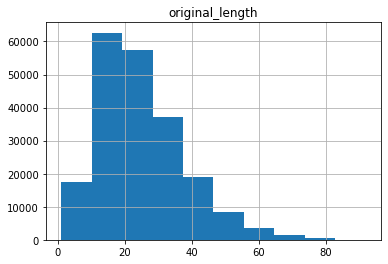

In [103]:
train_df[train_df['label']==1].hist(column='original_length')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002324C653D90>]],
      dtype=object)

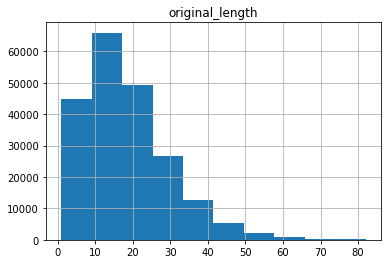

In [104]:
train_df[train_df['label']==0].hist(column='original_length')

In [105]:
print('length of input data:', len(train_df))
print('labeled as 0:', len(train_df[train_df['label']==0]))
print('labeled as 1:', len(train_df[train_df['label']==1]))

length of input data: 416768
labeled as 0: 208384
labeled as 1: 208384


In [106]:
print('training data labels:\n', y_train.value_counts(), '\n')
print('dev data labels:\n', y_test.value_counts())


training data labels:
 0    166835
1    166579
Name: label, dtype: int64 

dev data labels:
 1    41805
0    41549
Name: label, dtype: int64


In [107]:

def create_pipeline(clf, transformer):
    return Pipeline(
        [
                  ('transform', transformer),
                  ('classify', clf)
        ]
    )

In [108]:
evaluator = evaluation_helper()

In [109]:
def train(name, clf, transformer, Xtrain, Xtest, ytrain, ytest):
    
    print('='*6 + name + '='*6 )
    start_time = time.time()
    pipeline = create_pipeline(clf, transformer)
    pipeline.fit(Xtrain, ytrain)
    
    ypred = pipeline.predict(Xtest)

    evaluator.evaluate(name, ytest, ypred, time.time() - start_time)
    print()
    print()

In [110]:
classifiers = {}

classifiers["LogisticRegression"] = LogisticRegression(solver= 'lbfgs', max_iter=1000, random_state=RANDOM_SEED)

classifiers["RandomForestClassifier"] = RandomForestClassifier(random_state=RANDOM_SEED, max_depth=30, n_estimators=100)

classifiers["RandomForestClassifier"] = MultinomialNB()

classifiers["MLPClassifier"] = MLPClassifier(hidden_layer_sizes = [10], solver='sgd', max_iter=1000,
                         random_state = RANDOM_SEED)

classifiers["SVC"] = SVC()

naive_vectorizer = TfidfVectorizer(stop_words=None, lowercase=False, #token_pattern = r'\b[a-z]{3,12}\b', 
                                     min_df=50, ngram_range=(1, 3))

for k, v in classifiers.items():
    train(k, v, naive_vectorizer, X_train, X_test, y_train, y_test)
    train(k+"_tokenized", v, preprocessor.get_tfidf_transformer(), X_train_tokenized, X_test_tokenized, y_train_tokenized, y_test_tokenized)

======LogisticRegression======
Completed in 36.65s
confusion matrix: 
 [[29509 12040]
 [12095 29710]] 

f1=  0.7111483454012328 ; accuracy=  0.710451807951628 ; precision=  0.7116167664670658 ; recall=  0.7106805406051908
roc_auc=  0.7104511032949659


======LogisticRegression_tokenized======
Completed in 58.42s
confusion matrix: 
 [[28778 12771]
 [13323 28482]] 

f1=  0.685833995521202 ; accuracy=  0.6869496364901504 ; precision=  0.6904225147262018 ; recall=  0.6813060638679583
roc_auc=  0.6869670226437435


======RandomForestClassifier======
Completed in 24.20s
confusion matrix: 
 [[26667 14882]
 [12081 29724]] 

f1=  0.6879679670412332 ; accuracy=  0.6765242219929457 ; precision=  0.666367753217056 ; recall=  0.7110154287764622
roc_auc=  0.6764179649357773


======RandomForestClassifier_tokenized======
Completed in 15.26s
confusion matrix: 
 [[28361 13188]
 [15298 26507]] 

f1=  0.6504785276073619 ; accuracy=  0.6582527533171774 ; precision=  0.6677667212495276 ; recall=  0.6340629

In [15]:

base_search_pipeline = Pipeline(
        [
                  ('vectorizer', TfidfVectorizer()),
                  ('classifier', LogisticRegression(random_state=RANDOM_SEED, max_iter=100))
        ]
)

In [16]:

# clf = LogisticRegression(solver='liblinear', max_iter=10000, 
#                                  random_state=RANDOM_SEED)
# print(type(clf))
# filename = 'LogisticRegression.sav'

# # pipeline = pickle.load(open(filename, 'rb'))

# start_time = time.time()
# pipeline = create_pipeline(clf)
# pipeline.fit(X_train, y_train)
# # pickle.dump(pipeline, open(filename, 'wb'))

# y_pred = pipeline.predict(X_test)

# evaluator.evaluate('LogisticRegression', y_test, y_pred, time.time() - start_time)



In [8]:
##Grid Search to improve classifier

In [17]:

from sklearn.model_selection import GridSearchCV

param_grid = {
    'vectorizer__max_df': (0.6, 0.8, 1),
    'vectorizer__min_df': (0.01, 50, 100),
    'vectorizer__stop_words':(None, '{english}'),
    'vectorizer__lowercase': (True, False),
    'vectorizer__ngram_range': ((1, 2), (1, 3), (1, 4)),  # unigrams or bigrams
    'classifier__solver': ('lbfgs', 'liblinear', 'sag'),
}

search = GridSearchCV(base_search_pipeline, param_grid, cv=5, scoring='roc_auc', verbose=1)
search.fit(X_train, y_train)

search.best_params_

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


{'classifier__solver': 'sag',
 'vectorizer__lowercase': False,
 'vectorizer__max_df': 0.6,
 'vectorizer__min_df': 50,
 'vectorizer__ngram_range': (1, 4),
 'vectorizer__stop_words': None}

In [21]:
best_param_pipeline = Pipeline(
        [
                  ('vectorizer', TfidfVectorizer(max_df=0.6, min_df=50, ngram_range=(1,4), stop_words=None, lowercase=False)),
                  ('classifier', LogisticRegression(random_state=RANDOM_SEED, max_iter=10000, penalty='l2', solver='sag'))
        ]
    
)


start_time = time.time()
best_param_pipeline.fit(X_train, y_train)

y_pred = best_param_pipeline.predict(X_test)

evaluator.evaluate('LogisticRegression_w_gridsearch', y_test, y_pred, time.time() - start_time)

Completed in 35.42s
confusion matrix: 
 [[29505 12044]
 [12080 29725]] 

f1=  0.711345633809558 ; accuracy=  0.7105837752237445 ; precision=  0.7116521822404175 ; recall=  0.7110393493601244
roc_auc=  0.7105823717365497


(0.711345633809558,
 0.7105837752237445,
 0.7116521822404175,
 0.7110393493601244,
 0.7105823717365497)